<font size = "8.5" ><span style= "font-family:Altone Trial">Research Environment</span></font>

<font size = "6.5" ><span style= "font-family:Altone Trial">Data Science Workflow</span></font>

<font size = "3" ><span style= "font-family:Altone Trial">1. Project Scope

<font size = "3" ><span style= "font-family:Altone Trial">2. Data Gathering
    
<font size = "3" ><span style= "font-family:Altone Trial">3. Exploratory Data Analysis
    
<font size = "3" ><span style= "font-family:Altone Trial">4. Data Preprocessing

<font size = "3" ><span style= "font-family:Altone Trial">5. Model Creation
    
<font size = "3" ><span style= "font-family:Altone Trial">6. Model Evaluation

***

<font size = "6.5" ><span style= "font-family:Altone Trial">1. Project Scope</span></font>

<font size = "3" ><span style= "font-family:Altone Trial">Overview:
    
    
<font size = "3" ><span style= "font-family:Altone Trial">Sentiment analysis the process of classifying vast amounts of text data into several classes depending on the underlying tone of the text. These classes can be (but are not limited to) either positive, negative or neutral.
    

<font size = "3" ><span style= "font-family:Altone Trial">Business across various industries rely on sentiment analysis to derive actionable insights about their customers and devise strategies to ultimately increase revenue.
    
    
<font size = "3" ><span style= "font-family:Altone Trial">This data mining application is based on natural language processing and hence, can be extrapolated across a variety of real-world use cases involving textual data such as spam email detection, analyzing customer reviews to devise retention strategies, conducting market research to improve customer satisfaction, brand management, data driven investment decisions for hedge funds etc. 

<font size = "3" ><span style= "font-family:Altone Trial">Finalizing scope: 

<font size = "3" ><span style= "font-family:Altone Trial">To create a multipurpose text classification system (Machine Learning model) that can classify text into various classes.

<font size = "3" ><span style= "font-family:Altone Trial">Data requirements:
    
<font size = "3" ><span style= "font-family:Altone Trial">We will utilize the complete IMDB movie reviews dataset obtained from Kaggle to predict whether a movie review was positive or negative.

***

<font size = "6.5" ><span style= "font-family:Altone Trial">2. Data Gathering</span></font>

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd

In [3]:
#Importing the dataset
dataset = pd.read_csv(r'C:\Users\aashi\OneDrive\Desktop\Portfolio\Sentiment Analysis - Natural Language Processing\datasets\labeledTrainData.tsv', delimiter = '\t', quoting = 3)

***

<font size = "6.5" ><span style= "font-family:Altone Trial">3. Exploratory Data Analysis</span></font>

In [5]:
#Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Quick data check
dataset.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [5]:
#Checking datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [6]:
#Identifying missing data
dataset.isna().sum()

id           0
sentiment    0
review       0
dtype: int64

<font size = "3" ><span style= "font-family:Altone Trial">No Missing Data</span></font>

In [7]:
#Identifying duplicate rows
dataset[dataset.duplicated()]

,id,sentiment,review


<font size = "3" ><span style= "font-family:Altone Trial">No Duplicate Data</span></font>

1    12500
0    12500
Name: sentiment, dtype: int64


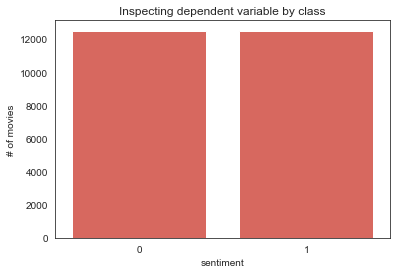

In [6]:
#inspecting dependent variable
sns.set_style('white')
print(dataset['sentiment'].value_counts())
sns.countplot(x=dataset['sentiment'], color='#D7685F', saturation=1)
plt.title('Inspecting dependent variable by class')
plt.ylabel('# of movies')
plt.show()

<font size = "3" ><span style= "font-family:Altone Trial">Based on the plot above, we can conclude that there's no class imbalance in the data that could potentially skew the model results.

***

<font size = "6.5" ><span style= "font-family:Altone Trial">4. Data Preprocessing</span></font>

<font size = "5" ><span style= "font-family:Altone Trial">Applying Natural Language Processing :</span></font>

In [9]:
#import required libraries
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
clean_data = []
for i in range(0, 25000):
    #removing non-letter character
    review = re.sub('[^a-zA-Z]',' ', dataset['review'][i])
    #converting to lower case letters
    review = review.lower()
    #tokenizing senetences/phrases
    #we will first split the review into words as each review is in a string format right now
    review = word_tokenize(review)
    #stemming
    ps = PorterStemmer()
    #creating for loop to remove stop words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #converting the review back to a string format
    review = ' '.join(review)
    clean_data.append(review)

<font size = "5" ><span style= "font-family:Altone Trial">Pre-requisites for Bag Of Words model :</span></font>

In [12]:
#import required libraries
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
#creating a Count vectorizer object for BOW model
cv = CountVectorizer(max_features = 5000)

In [14]:
#creating dataframes from target variable and features
X = cv.fit_transform(clean_data).toarray()
y = dataset['sentiment'].values

<font size = "5" ><span style= "font-family:Altone Trial">Pre-requisites for a Tf-Idf model :</span></font>

In [15]:
#import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
#creating an object for Tf-idf model
tfidf = TfidfVectorizer()

In [17]:
#creating dataframes from target variable and features
X2 = tfidf.fit_transform(clean_data).toarray()
y2 = dataset['sentiment'].values

<font size = "5" ><span style= "font-family:Altone Trial">Preparing the data for modelling :

In [18]:
#importing required libraries
from sklearn.model_selection import train_test_split

In [19]:
#Splitting the data into training and test sets for BOW model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [20]:
#Splitting the data into training and test sets for Tf-Idf model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

***

<font size = "6.5" ><span style= "font-family:Altone Trial">5. Model Creation</span></font>

<font size = "5.5" ><span style= "font-family:Altone Trial">5.1  Creating BOW Model :

<font size = "5" ><span style= "font-family:Altone Trial">Logistic Regression :

In [44]:
#Creating object 'lr' of LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)

In [45]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracy_lr = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10, scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracy_lr.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_lr.std()*100))

Accuracy: 85.59 %
Standard Deviation: 0.82 %


<font size = "5" ><span style= "font-family:Altone Trial">Decision Tree :

In [29]:
#Creating object 'dt' of DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [30]:
#Applying k-fold cross validation
accuracy_dt = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=10, scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracy_dt.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_dt.std()*100))

Accuracy: 71.00 %
Standard Deviation: 1.21 %


<font size = "5" ><span style= "font-family:Altone Trial">Random Forest :

In [31]:
#Creating object 'rf' of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [32]:
#Applying k-fold cross validation
accuracy_rf = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10, scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracy_rf.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_rf.std()*100))

Accuracy: 83.82 %
Standard Deviation: 0.63 %


***

<font size = "5.5" ><span style= "font-family:Altone Trial">5.1  Creating a Tf-Idf Model :

<font size = "5" ><span style= "font-family:Altone Trial">Logistic Regression :

In [33]:
#Creating object 'lr2' of LogisticRegression
lr2 = LogisticRegression()

In [34]:
#Applying k-fold cross validation
accuracy_lr2 = cross_val_score(estimator=lr2, X=X2_train, y=y2_train, cv=10, scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracy_lr2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_lr2.std()*100))

Accuracy: 88.58 %
Standard Deviation: 0.71 %


<font size = "5" ><span style= "font-family:Altone Trial">Decision Tree :

In [37]:
#Creating object 'dt2' of DecisionTreeClassifier
dt2 = DecisionTreeClassifier()

In [39]:
#Applying k-fold cross validation
accuracy_dt2 = cross_val_score(estimator=dt2, X=X2_train, y=y2_train, cv=10, scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracy_dt2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_dt2.std()*100))

Accuracy: 71.60 %
Standard Deviation: 1.02 %


<font size = "5" ><span style= "font-family:Altone Trial">Random Forest :

In [40]:
#Creating object 'rf2' of RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [42]:
#Applying k-fold cross validation
accuracy_rf2 = cross_val_score(estimator=rf2, X=X2_train, y=y2_train, cv=10, scoring='accuracy')
print("Accuracy: {:.2f} %".format(accuracy_rf2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_rf.std()*100))

Accuracy: 84.50 %
Standard Deviation: 0.60 %


***

<font size = "6.5" ><span style= "font-family:Altone Trial">6. Model Evaluation</span></font>

<font size = "3" ><span style= "font-family:Altone Trial">Since the Tf-Idf Logistic Regression model performs the best, it will be used to evaluate the model peformance against the test set.

#Training the lr2 model on training set
lr2.fit(X2_train, y2_train)

In [47]:
#Predicting the Test set results using 
y_pred = lr2.predict(X2_test)

In [48]:
#Evaluating model performance

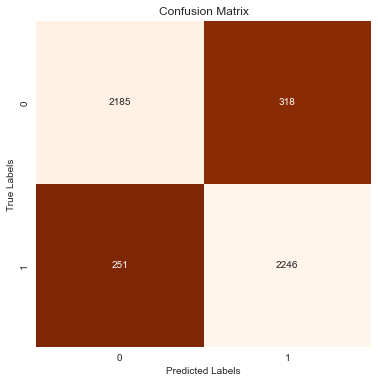

In [49]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges_r', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [50]:
#Calculating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = round(accuracy_score(y2_test, y_pred)* 100, 2)
precision = round(precision_score(y2_test, y_pred)* 100, 2)
recall = round(recall_score(y2_test, y_pred)* 100, 2)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 88.62
Precision: 87.60
Recall: 89.95


<font size = "5" ><span style= "font-family:Altone Trial">Saving model artificats for deployment purposes  :

In [51]:
#Pickling necessary python objects
import pickle

In [52]:
#Pickling Tf-Idf Logistic Regression model
with open(r'C:\Users\aashi\OneDrive\Desktop\Portfolio\Sentiment Analysis - Natural Language Processing\model artifacts\lr2.pkl', 'wb') as model_pkl:
    pickle.dump(lr2, model_pkl)

In [53]:
#Pickling the Tf-Idf object
with open(r'C:\Users\aashi\OneDrive\Desktop\Portfolio\Sentiment Analysis - Natural Language Processing\model artifacts\tfidf.pkl', 'wb') as tfidf_pkl:
    pickle.dump(tfidf, tfidf_pkl)

***

<font size = "5" ><span style= "font-family:Altone Trial">The End